In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'April 2018'

<h2>Основная таблица</h2>

In [6]:
rep_2017 = report['2017':] # данные за 2017 год
rep_2017

channels                            goals                       
             yandex google go.mail.ru  bry cpc order basket contact measure
2017-01-31     2949   3084        375  511   0     4    243     355       8
2017-02-28     2701   2414        282  486   0     8    197     311      14
2017-03-31     2590   2283        284  426   0    11    157     298      11
2017-04-30     1890   2390        243  395   0    10    123     260      31
2017-05-31     2006   2584        110  389   0     4    106     221      29
2017-06-30     2048   2164        154  407   0     7    137     182      24
2017-07-31     2218   2172        147  316   0     4     81     221      16
2017-08-31     1995   1892         98  191   0     1     67     197      31
2017-09-30     1767   1596         62  123   0    10    100     151      16
2017-10-31     2027   2004         58   35   0     8     84     193      14
2017-11-30     1930   1669         54   11   0     2     85     183      15
2017-12-31     2375   2035         45   11   0     2     89     110      11
2018-01-31     2477   1881         32    5   0     1     74     136      12
2018-02-28     2527   1625         44    7   0     3    121     130      16
2018-03-31     2568   1997         51    6   0    10     79     197      12
2018-04-30     2359   2410         74    5   0     1     56     129       9

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [7]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-04-30     -209    413         23  -1   0    -9    -23     -68      -3

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

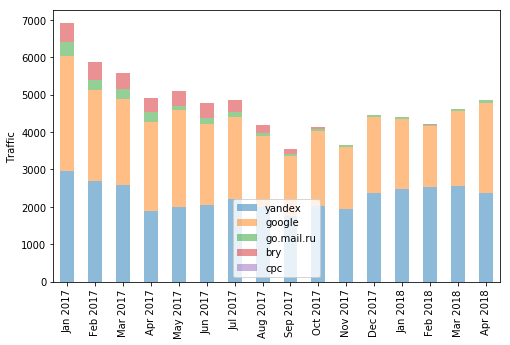

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2017.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
#fig.autofmt_xdate()
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2017.index]);

<h3>Линейная диаграмма изменений трафика</h3>

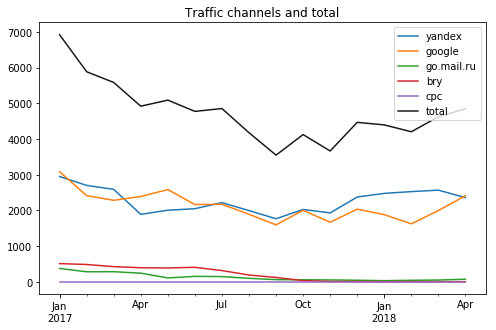

In [9]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2017.channels.plot(ax=ax);
rep_2017.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [10]:
kw = 'keyword visit'.split()

In [21]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
bing       0                                                amazon      1
           1                                      np - /?pid=pokaz      1
           2                                          дверь книжка      1
go.mail.ru 0                                             (not set)     74
google     0                                       двери из дерева    263
           1                                         дешевые двери    218
           2                                          двери дешево    190
           3                             np - /?cnt=catalog&r=2438    127
           4                                      np - /?pid=pokaz     94
           5                                                np - /     91
           6                             np - /?cnt=catalog&r=1428     64
           7                                         двери продажа     60
           8                                         полотно двери     31
           9                               np - /?pid=menu-katalog     11
           10                               дверное полотно дешево     10
           11                                    полотно для двери     10
           12                                      дверное полотно      5
           13                             np - /?cnt=catalog&r=473      4
           14                                   np - /?pid=contact      4
           15                                     двери с коробкой      4
           16                            np - /?cnt=catalog&r=4126      3
           17                                 np - /?pid=pricelist      3
           18                                      дверные полотна      3
           19                               дверные полотна купить      3
           20                            np - /?cnt=catalog&r=1010      2
           21                            np - /?cnt=catalog&r=1259      2
           22                            np - /?cnt=catalog&r=1466      2
           23                             np - /?cnt=catalog&r=192      2
           24                             np - /?cnt=catalog&r=233      2
           25                            np - /?cnt=catalog&r=2553      2
...                                                            ...    ...
yandex     1855                 нужна ли дверь в кухню из коридора      1
           1856                            нужна ли дверь на кухне      1
           1857           нужна ли дверь на кухне с газовой плитой      1
           1858                            нужна ли дверь на кухню      1
           1859   нужна ли дверь на кухню в однокомнатной квартире      1
           1860                нужна ли дверь на кухню за и против      1
           1861           нужна ли дверь на кухня п 3 туалет рядом      1
           1862                    нужна ли на кухне дверь или нет      1
           1863                    нужно ли ставить дверь на кухню      1
           1864                   оби дверное полотно массив сосны      1
           1865                обклеить дверное полотно молдингами      1
           1866                  обрамление дверного проема купить      1
           1867  обыграть дверь в кухни двери на кухню дизайн ф...      1
           1868  обязательно ли установление двери на кухню с г...      1
           1869                ограничитель открывания двери кухни      1
           1870  одностворчатая кухонная дверь со стеклом роспу...      1
           1871        олови дверное полотно м9х21 крашенное белое      1
           1872               ооо принцип дпг аликанте дверь эмаль      1
           1873                          оранжевые двери для кухни      1
           1874                        оригинальная дверь на кухню      1
           1875  откатная дверь на кухне дверь на кухню со стек...      1
           1876                            откатная дверь на кухню      1
           1877       откатное полотно дверей с наружными ролик

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [12]:
data[kw].xs(0, level=1)

,keyword,visit
bing,amazon,1
go.mail.ru,(not set),74
google,двери из дерева,263
rambler,раздвижные двери в рассрочку,1
yandex,(not set),236


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [17]:
data_grupped = data.sort_values('visit', ascending=False).groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.iloc[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0                         amazon      1
           2                   дверь книжка      1
           1               np - /?pid=pokaz      1
go.mail.ru 0                      (not set)     74
google     0                двери из дерева    263
           1                  дешевые двери    218
           2                   двери дешево    190
           3      np - /?cnt=catalog&r=2438    127
           4               np - /?pid=pokaz     94
rambler    0   раздвижные двери в рассрочку      1
           1                флоренция венге      1
yandex     0                      (not set)    236
           11                дверь на кухню     17
           10               дверное полотно     17
           12                двери на кухню     13
           13     дверь на кухню со стеклом     13